<a href="https://colab.research.google.com/github/aa57c/CS_5588_DS_Capstone_Assignments/blob/hands_on_assignments/Hands_On_10_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import VotingClassifier

Import First Dataset and Print Correlation Matrix: [Dataset Link](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

In [2]:
# Load dataset
health_indicators_dataset = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2021.csv')

health_indicators_dataset = health_indicators_dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Rename the outcome column to 'Diabetes_Status'

health_indicators_dataset.rename(columns={'Diabetes_012': 'Diabetes_Status'}, inplace=True)

# Rename the 'Sex' column to 'Gender
health_indicators_dataset.rename(columns={'Sex': 'Gender'}, inplace=True)

# Rename the 'PhysActivity" column to "PhysicallyActive"
health_indicators_dataset.rename(columns={'PhysActivity': 'PhysicallyActive'}, inplace=True)

# Rename the "Smoker" and "HvyHvyAlcoholConsump" to "Smoking" and "Alcohol" respectively
health_indicators_dataset.rename(columns={'Smoker': 'Smoking', 'HvyAlcoholConsump': 'Alcohol'}, inplace=True)
# Print correlation matrix
correlation_matrix = health_indicators_dataset.corr()
print(correlation_matrix)

# printing the head of the dataset
print(health_indicators_dataset.head())

<ipython-input-2-9f94d3c215a8>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  health_indicators_dataset = health_indicators_dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)


                      Diabetes_Status    HighBP  HighChol  CholCheck  \
Diabetes_Status              1.000000  0.269086  0.207435   0.072222   
HighBP                       0.269086  1.000000  0.283285   0.099415   
HighChol                     0.207435  0.283285  1.000000   0.098558   
CholCheck                    0.072222  0.099415  0.098558   1.000000   
BMI                          0.211801  0.213951  0.087188   0.036226   
Smoking                      0.058910  0.099570  0.082402  -0.012874   
Stroke                       0.102715  0.126594  0.085947   0.025386   
HeartDiseaseorAttack         0.177432  0.203191  0.170668   0.043867   
PhysicallyActive            -0.151657 -0.132253 -0.076648  -0.008454   
Fruits                      -0.030489 -0.031542 -0.024408   0.024951   
Veggies                     -0.047853 -0.036013 -0.031931   0.017397   
Alcohol                     -0.058904 -0.003424 -0.014275  -0.028933   
AnyHealthcare                0.026366  0.049833  0.056505   0.15

Import Gestational Diabetes Dataset and Print Out Correlation Matrix: [Dataset Link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [3]:
# load dataset
gestational_diabetes_dataset = pd.read_csv('/content/gestational_diabetes_dataset.csv')

gestational_diabetes_dataset = gestational_diabetes_dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Rename the outcome column to 'Diabetes_Status' and map values of 1 to 3
gestational_diabetes_dataset.rename(columns={'Outcome': 'Diabetes_Status'}, inplace=True)
gestational_diabetes_dataset['Diabetes_Status'] = gestational_diabetes_dataset['Diabetes_Status'].map({0: 0, 1: 3})

# print correlation matrix
correlation_matrix = gestational_diabetes_dataset.corr()
print(correlation_matrix)

# Define a function to classify BP levels based only on Diastolic BP
def classify_bp(row):
    dia_bp = row['BloodPressure']

    if dia_bp < 60:
        return 0  # Low BP
    elif 60 <= dia_bp <= 80:
        return 1  # Normal BP
    else:
        return 2  # High BP

# Apply the function to create the 'BPLevel' column based on diastolic pressure
gestational_diabetes_dataset['BPLevel'] = gestational_diabetes_dataset.apply(classify_bp, axis=1)

# Remove the 'Dia BP' column (and 'Sys BP' if no longer needed)
gestational_diabetes_dataset.drop(['BloodPressure'], axis=1, inplace=True)


# printing the head of the dataset
print(gestational_diabetes_dataset.head())

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Diabetes_Status              0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<ipython-input-3-d486672f1325>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gestational_diabetes_dataset = gestational_diabetes_dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Import Another Dataset with more samples: [Dataset Link](https://github.com/steve-zeyu-zhang/DiabetesDiagnosis/blob/main/data/BIT_2019.csv)

In [4]:
# import dataset
bit_2019_dataset = pd.read_csv('/content/BIT_2019.csv')

bit_2019_dataset = bit_2019_dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# rename column "highBP" to HighBP
bit_2019_dataset.rename(columns={'highBP': 'HighBP'}, inplace=True)

# rename column "Pregancies" to "Pregnancies"
bit_2019_dataset.rename(columns={'Pregancies': 'Pregnancies'}, inplace=True)

bit_2019_dataset['BPLevel'] = bit_2019_dataset['BPLevel'].str.lower()
# Strip any leading or trailing whitespace in the 'BPLevel' column
bit_2019_dataset['BPLevel'] = bit_2019_dataset['BPLevel'].str.strip()

# Function to classify diabetes status based on Diabetic, Pdiabetes, and Pregancies columns
def classify_diabetes(row):
    if row['Diabetic'] == 'no' and row['Pdiabetes'] == 0:
        return 'No Diabetes'
    elif row['Pdiabetes'] == 1:
        return 'Prediabetes'
    elif row['Diabetic'] == 'yes' and row['Pregnancies'] == 0:
        return 'Type-2 Diabetes'
    elif row['Diabetic'] == 'yes' and row['Pregnancies'] > 0 and row['Gender'] == 0: # only females
        return 'Gestational Diabetes'
    else:
        return 'Unknown'

# Fill missing values in 'Pdiabetes' and 'Diabetic' columns
bit_2019_dataset['Pdiabetes'].fillna('0', inplace=True)  # Assuming no prediabetes for missing values
bit_2019_dataset['Diabetic'].fillna('no', inplace=True)  # Assuming no diabetes for missing values

# Standardize the 'Pdiabetes' column to binary format (0 for no, 1 for yes)
bit_2019_dataset['Pdiabetes'] = bit_2019_dataset['Pdiabetes'].replace({'yes': 1, 'no': 0, '0': 0}).astype(int)

# Apply the classification function to create the target column 'Diabetes_Status'
bit_2019_dataset['Diabetes_Status'] = bit_2019_dataset.apply(classify_diabetes, axis=1)

# Check the distribution of the newly created 'Diabetes_Status' column
print(bit_2019_dataset['Diabetes_Status'].value_counts())

# Drop rows where 'Diabetes_Status' is 'Unknown'
bit_2019_dataset = bit_2019_dataset[bit_2019_dataset['Diabetes_Status'] != 'Unknown']


# Define a function to convert age ranges to numeric values (e.g., using the midpoint of the range)
def convert_age_range(age_range):
    if isinstance(age_range, str) and '-' in age_range:
        age_min, age_max = age_range.split('-')
        return (int(age_min) + int(age_max)) // 2
    else:
        return pd.to_numeric(age_range, errors='coerce')  # Handle any non-range values

# Apply the function to the Age column
bit_2019_dataset['Age'] = bit_2019_dataset['Age'].apply(convert_age_range)

# Identify all columns with 'object' dtype (categorical columns)
categorical_columns = bit_2019_dataset.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    bit_2019_dataset[column] = label_encoder.fit_transform(bit_2019_dataset[column])
    # Print the mapping of original values to encoded values
    print(f"Mapping for column '{column}':")
    for i, item in enumerate(label_encoder.classes_):
        print(f"{item} --> {i}")
    print()  # Just to add a blank line between mappings

# print correlation matrix
correlation_matrix = bit_2019_dataset.corr()
print(correlation_matrix)

# printing the head of the dataset
print(bit_2019_dataset.head())

Diabetes_Status
No Diabetes        684
Type-2 Diabetes    188
Unknown             66
Prediabetes         14
Name: count, dtype: int64
Mapping for column 'Gender':
Female --> 0
Male --> 1

Mapping for column 'Family_Diabetes':
no --> 0
yes --> 1



<ipython-input-4-03d88d2468c1>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  bit_2019_dataset = bit_2019_dataset.applymap(lambda x: x.strip() if isinstance(x, str) else x)
<ipython-input-4-03d88d2468c1>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bit_2019_dataset['Pdiabetes'].fillna('0', inplace=True)  # Assuming no prediabetes for missing values
<ipython-input-4-03d88d2468c1>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignm

Mapping for column 'HighBP':
no --> 0
yes --> 1

Mapping for column 'PhysicallyActive':
less than half an hr --> 0
more than half an hr --> 1
none --> 2
one hr or more --> 3

Mapping for column 'Smoking':
no --> 0
yes --> 1

Mapping for column 'Alcohol':
no --> 0
yes --> 1

Mapping for column 'RegularMedicine':
no --> 0
yes --> 1

Mapping for column 'JunkFood':
always --> 0
occasionally --> 1
often --> 2
very often --> 3

Mapping for column 'Stress':
always --> 0
not at all --> 1
sometimes --> 2
very often --> 3

Mapping for column 'BPLevel':
high --> 0
low --> 1
normal --> 2

Mapping for column 'UriationFreq':
not much --> 0
quite often --> 1

Mapping for column 'Diabetic':
no --> 0
yes --> 1

Mapping for column 'Diabetes_Status':
No Diabetes --> 0
Prediabetes --> 1
Type-2 Diabetes --> 2

                           Age    Gender  Family_Diabetes    HighBP  \
Age               1.000000e+00  0.109109        -0.141375  0.189337   
Gender            1.091089e-01  1.000000        -0.043278

<ipython-input-4-03d88d2468c1>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bit_2019_dataset[column] = label_encoder.fit_transform(bit_2019_dataset[column])


Import Another Dataset for Gestational Diabetes Classification: [Dataset Link](https://www.kaggle.com/datasets/sumathisanthosh/gestational-diabetes-mellitus-gdm-data-set?select=Gestational+Diabetic+Dat+Set.xlsx)

In [5]:
# import dataset
gestational_diabetes_dataset2 = pd.read_excel('/content/gestational_diabetes_dataset2.xlsx')

gestational_diabetes_dataset2 = gestational_diabetes_dataset2.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# print out correlation matrix
correlation_matrix = gestational_diabetes_dataset2.corr()
print(correlation_matrix)

# printing the head of the dataset
print(gestational_diabetes_dataset2.head())

# drop columns that are unnecessary for training
columns_to_drop = ["Case Number", "OGTT", "HDL", "Hemoglobin"]
gestational_diabetes_dataset2.drop(columns=columns_to_drop, inplace=True)

# Rename "No of Pregnancy" column to "Pregnancies", "Class Label(GDM /Non GDM)" to "Diabetes_Status", "Prediabetes" column to "Pdiabetes", "Family History" to "Family_Diabetes"
gestational_diabetes_dataset2.rename(columns={'No of Pregnancy': 'Pregnancies'}, inplace=True)
gestational_diabetes_dataset2.rename(columns={'Class Label(GDM /Non GDM)': 'Diabetes_Status'}, inplace=True)
gestational_diabetes_dataset2.rename(columns={'Prediabetes': 'Pdiabetes'}, inplace=True)
gestational_diabetes_dataset2.rename(columns={'Family History': 'Family_Diabetes'}, inplace=True)


gestational_diabetes_dataset2['Diabetes_Status'] = gestational_diabetes_dataset2['Diabetes_Status'].map({0: 0, 1: 3})

def classify_bp(row):
    sys_bp = row['Sys BP']
    dia_bp = row['Dia BP']

    if sys_bp < 90 or dia_bp < 60:
        return 0  # Low BP
    elif 90 <= sys_bp <= 120 and 60 <= dia_bp <= 80:
        return 1  # Normal BP
    else:
        return 2  # High BP

# Apply the function to create the 'BPLevel' column
gestational_diabetes_dataset2['BPLevel'] = gestational_diabetes_dataset2.apply(classify_bp, axis=1)

# Remove the 'Sys BP' and 'Dia BP' columns
gestational_diabetes_dataset2.drop(['Sys BP', 'Dia BP'], axis=1, inplace=True)

print(gestational_diabetes_dataset2.head())



                                 Case Number       Age  No of Pregnancy  \
Case Number                         1.000000  0.389118         0.250554   
Age                                 0.389118  1.000000         0.262048   
No of Pregnancy                     0.250554  0.262048         1.000000   
Gestation in previous Pregnancy     0.376781  0.327148         0.669666   
BMI                                 0.698480  0.516200         0.084370   
HDL                                -0.507670 -0.444572         0.011123   
Family History                      0.150812  0.298882         0.012854   
unexplained prenetal loss           0.147234  0.183008         0.195286   
Large Child or Birth Default        0.365506  0.132220         0.295575   
PCOS                                0.585108  0.425936         0.165494   
Sys BP                              0.642472  0.619515         0.368070   
Dia BP                              0.517167  0.481878         0.144426   
OGTT                     

<ipython-input-5-9487ee98b5e5>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gestational_diabetes_dataset2 = gestational_diabetes_dataset2.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Separating all datasets into 2 different ones: one for female samples and one for male samples

In [6]:
# Separating datasets into male and female sample categories

# female_data = pd.concat([bit_2019_dataset[bit_2019_dataset['Gender'] == 0], health_indicators_dataset[health_indicators_dataset['Sex'] == 0, gestational_diabetes_dataset])
female_data = pd.concat([bit_2019_dataset[bit_2019_dataset['Gender'] == 0],
                         health_indicators_dataset[health_indicators_dataset['Gender'] == 0],
                         gestational_diabetes_dataset, gestational_diabetes_dataset2], axis=0)
male_data = pd.concat([bit_2019_dataset[bit_2019_dataset['Gender'] == 1],
                       health_indicators_dataset[health_indicators_dataset['Gender'] == 1]], axis=0)



Check Distribution of Classes (We will have to use SMOTE to balance)

In [7]:
# Check the distribution of Diabetes_Status in the male dataset to confirm no '3's (gestational diabetes)
print("==== Male Data ====")
print(male_data['Diabetes_Status'].value_counts())

# Check the distribution of Diabetes_Status in the female dataset
print("==== Female Data ====")
print(female_data['Diabetes_Status'].value_counts())

==== Male Data ====
Diabetes_Status
0.0    93258
2.0    17616
1.0     2650
Name: count, dtype: int64
==== Female Data ====
Diabetes_Status
0.0    107270
2.0     16140
1.0      2983
3.0      1640
Name: count, dtype: int64


Remove Unnecessary Columns for Training

In [8]:
'''
drop columns "Gender",
HighChol", "CholCheck", "Stroke",
"HeartDiseaseorAttack", "Fruits",
"Veggies", "AnyHealthcare", "NoDocbcCost",
"GenHlth", "MenHlth", "PhysHlth", "DiffWalk",
"Education", "Income", "Glucose", "SkinThickness", "Insulin", "Diabetes_Pedigree_Function", "Pdiabetes"
from male and female dataframes
'''
columns_to_drop_female = ["Gender", "HighChol", "CholCheck", "Stroke",
"HeartDiseaseorAttack", "Fruits",
"Veggies", "AnyHealthcare", "NoDocbcCost",
"GenHlth", "MentHlth", "PhysHlth", "DiffWalk",
"Education", "Income", "Glucose", "SkinThickness", "Insulin", "Pdiabetes", "DiabetesPedigreeFunction", "Diabetic"]

columns_to_drop_male = ["Gender", "HighChol", "CholCheck", "Stroke", "Diabetic", "Pregnancies",
"HeartDiseaseorAttack", "Fruits",
"Veggies", "AnyHealthcare", "NoDocbcCost",
"GenHlth", "MentHlth", "PhysHlth", "DiffWalk",
"Education", "Income", "Pdiabetes"]

# Drop the specified columns from the male and female dataframes
female_data.drop(columns=columns_to_drop_female, inplace=True)
male_data.drop(columns=columns_to_drop_male, inplace=True)

# Save dataframes to csv files
female_data.to_csv('female_data.csv', index=False)
male_data.to_csv('male_data.csv', index=False)


In [10]:
# Check class distribution again
print("==== Female Data ====")
print(female_data['Diabetes_Status'].value_counts())

# Check the distribution of Diabetes_Status in the male dataset
print("==== Male Data ====")
print(male_data['Diabetes_Status'].value_counts())

==== Female Data ====
Diabetes_Status
0.0    107270
2.0     16140
1.0      2983
3.0      1640
Name: count, dtype: int64
==== Male Data ====
Diabetes_Status
0.0    93258
2.0    17616
1.0     2650
Name: count, dtype: int64


impute missing data, Use SMOTE, prepare for model training

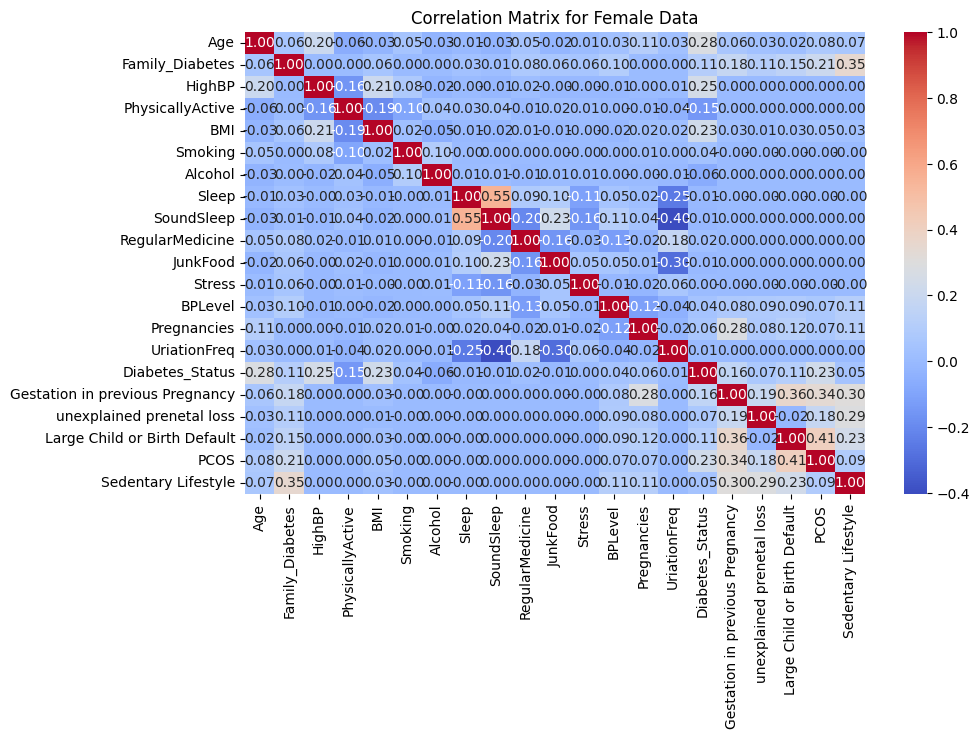

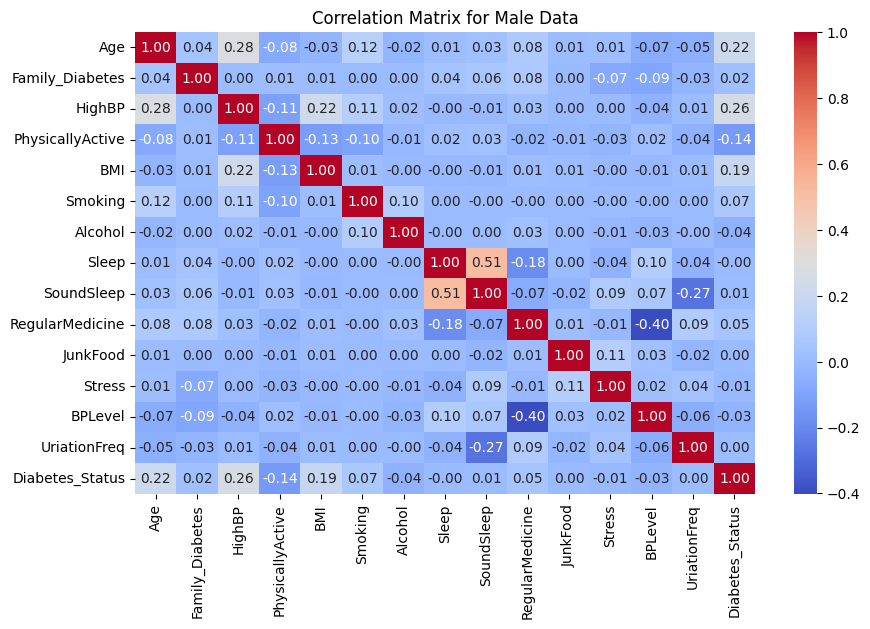

Class distribution in resampled female dataset:
Diabetes_Status
0.0    85873
2.0    85873
3.0    85873
1.0    85873
Name: count, dtype: int64

Class distribution in resampled male dataset:
Diabetes_Status
0.0    74635
2.0    74635
1.0    74635
Name: count, dtype: int64
[0]	validation_0-merror:0.32914	validation_1-merror:0.40184
[1]	validation_0-merror:0.31500	validation_1-merror:0.38060
[2]	validation_0-merror:0.30676	validation_1-merror:0.37755
[3]	validation_0-merror:0.30131	validation_1-merror:0.34994
[4]	validation_0-merror:0.30095	validation_1-merror:0.34780
[5]	validation_0-merror:0.29965	validation_1-merror:0.34998
[6]	validation_0-merror:0.29893	validation_1-merror:0.34619
[7]	validation_0-merror:0.29809	validation_1-merror:0.34248
[8]	validation_0-merror:0.29686	validation_1-merror:0.33030
[9]	validation_0-merror:0.29511	validation_1-merror:0.32702
[10]	validation_0-merror:0.28995	validation_1-merror:0.32413
[11]	validation_0-merror:0.28790	validation_1-merror:0.33100
[12]	val

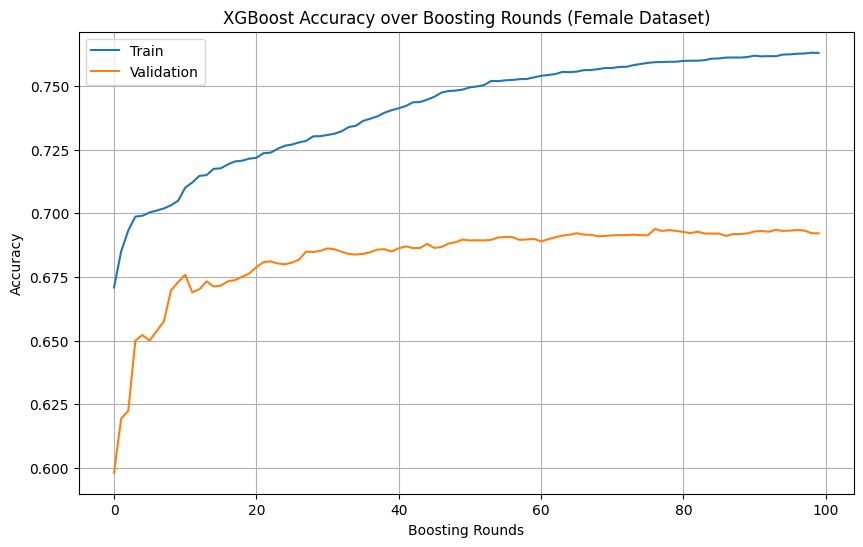

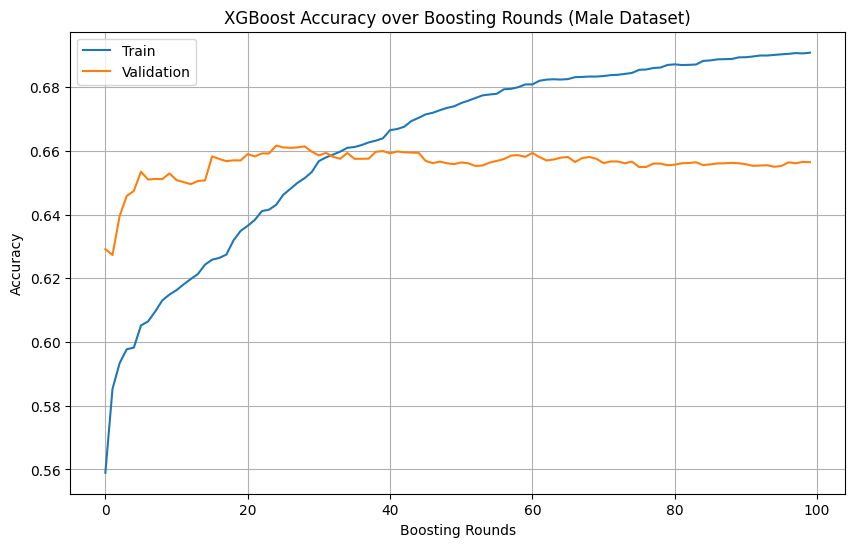

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
import numpy as np


# Assuming female_data and male_data are your DataFrames

# 1. Identify numerical and categorical columns for female data
female_numerical_cols = female_data.select_dtypes(include=['int64', 'float64']).columns
female_categorical_cols = female_data.select_dtypes(include=['object']).columns

# 2. Identify numerical and categorical columns for male data
male_numerical_cols = male_data.select_dtypes(include=['int64', 'float64']).columns
male_categorical_cols = male_data.select_dtypes(include=['object']).columns

# 3. Define the imputation strategies
numerical_imputer = SimpleImputer(strategy='mean')  # For numerical features (use 'median' if desired)
categorical_imputer = SimpleImputer(strategy='most_frequent')  # For categorical features

# 4. Column transformers for both datasets
female_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_imputer, female_numerical_cols),
        ('cat', categorical_imputer, female_categorical_cols)
    ])

male_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_imputer, male_numerical_cols),
        ('cat', categorical_imputer, male_categorical_cols)
    ])

# 5. Apply the imputations for the female dataset
female_data_imputed = pd.DataFrame(female_preprocessor.fit_transform(female_data),
                                   columns=female_numerical_cols.append(female_categorical_cols))

# 6. Apply the imputations for the male dataset
male_data_imputed = pd.DataFrame(male_preprocessor.fit_transform(male_data),
                                 columns=male_numerical_cols.append(male_categorical_cols))

# 7. Print Correlation Matrices of the imputed data using sns heatmaps
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrices for female and male data
correlation_matrix_female = female_data_imputed.corr()
correlation_matrix_male = male_data_imputed.corr()

# Plot heatmaps for correlation matrices
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_female, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Female Data")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_male, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Male Data")
plt.show()

# Print the first few rows of the imputed datasets
# print(female_data_imputed.head())
# print(male_data_imputed.head())

# 7. Splitting the datasets into X and y
X_female = female_data_imputed.drop('Diabetes_Status', axis=1)
y_female = female_data_imputed['Diabetes_Status']

X_male = male_data_imputed.drop('Diabetes_Status', axis=1)
y_male = male_data_imputed['Diabetes_Status']


# 8. Train-Test Split for both datasets
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

# 9. Apply SMOTE to the female dataset
smote = SMOTE(random_state=42)
X_female_resampled, y_female_resampled = smote.fit_resample(X_train_female, y_train_female)

# 10. Apply SMOTE to the male dataset
X_male_resampled, y_male_resampled = smote.fit_resample(X_train_male, y_train_male)


# Check class distribution in the resampled female dataset
female_class_distribution = y_female_resampled.value_counts()
print("Class distribution in resampled female dataset:")
print(female_class_distribution)

# Check class distribution in the resampled male dataset
male_class_distribution = y_male_resampled.value_counts()
print("\nClass distribution in resampled male dataset:")
print(male_class_distribution)


from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Define the evaluation sets (training and validation)
eval_set_female = [(X_female_resampled, y_female_resampled), (X_test_female, y_test_female)]
eval_set_male = [(X_male_resampled, y_male_resampled), (X_test_male, y_test_male)]

# 11. Train XGBoost model on the resampled female dataset
xgb_female = XGBClassifier(random_state=42, eval_metric='merror')
xgb_female.fit(X_female_resampled, y_female_resampled, eval_set=eval_set_female, verbose=True)

# 12. Train XGBoost model on the resampled male dataset
xgb_male = XGBClassifier(random_state=42, eval_metric='merror')
xgb_male.fit(X_male_resampled, y_male_resampled, eval_set=eval_set_male, verbose=True)

# 13. Make predictions on the test set for the female dataset
y_pred_female = xgb_female.predict(X_test_female)

# 14. Make predictions on the test set for the male dataset
y_pred_male = xgb_male.predict(X_test_male)

# 15. Evaluate performance of the female model
print("Classification Report for Female Dataset:")
print(classification_report(y_test_female, y_pred_female))

# 16. Evaluate performance of the male model
print("\nClassification Report for Male Dataset:")
print(classification_report(y_test_male, y_pred_male))


# Extract evaluation results
evals_result_female = xgb_female.evals_result()
evals_result_male = xgb_male.evals_result()

# Plot the training and validation loss over iterations (boosting rounds)
epochs_female = len(evals_result_female['validation_0']['merror'])  # or 'error' if used as metric
x_axis_female = range(0, epochs_female)

# Plot accuracy
plt.figure(figsize=(10,6))
plt.plot(x_axis_female, 1 - np.array(evals_result_female['validation_0']['merror']), label='Train')
plt.plot(x_axis_female, 1 - np.array(evals_result_female['validation_1']['merror']), label='Validation')
plt.xlabel('Boosting Rounds')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy over Boosting Rounds (Female Dataset)')
plt.legend()
plt.grid(True)
plt.show()



# Plot the training and validation loss over iterations (boosting rounds)
epochs_male = len(evals_result_male['validation_0']['merror'])  # or 'error' if used as metric
x_axis_male = range(0, epochs_male)

# Plot accuracy
plt.figure(figsize=(10,6))
plt.plot(x_axis_male, 1 - np.array(evals_result_male['validation_0']['merror']), label='Train')
plt.plot(x_axis_male, 1 - np.array(evals_result_male['validation_1']['merror']), label='Validation')
plt.xlabel('Boosting Rounds')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy over Boosting Rounds (Male Dataset)')
plt.legend()
plt.grid(True)
plt.show()














Print Out Feature Importance of Both Datasets During Predictions


Feature Importance for Female Dataset:


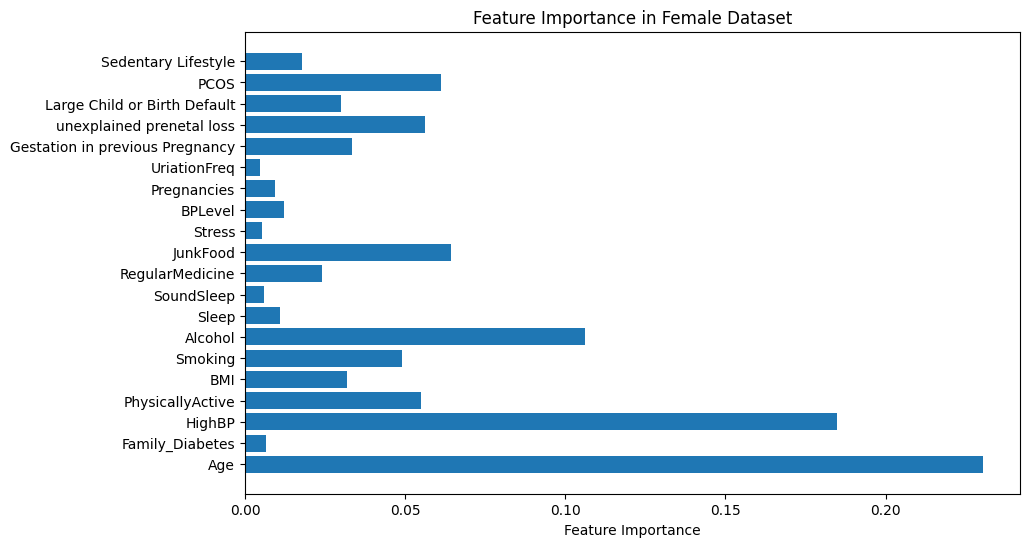


Feature Importance for Male Dataset:


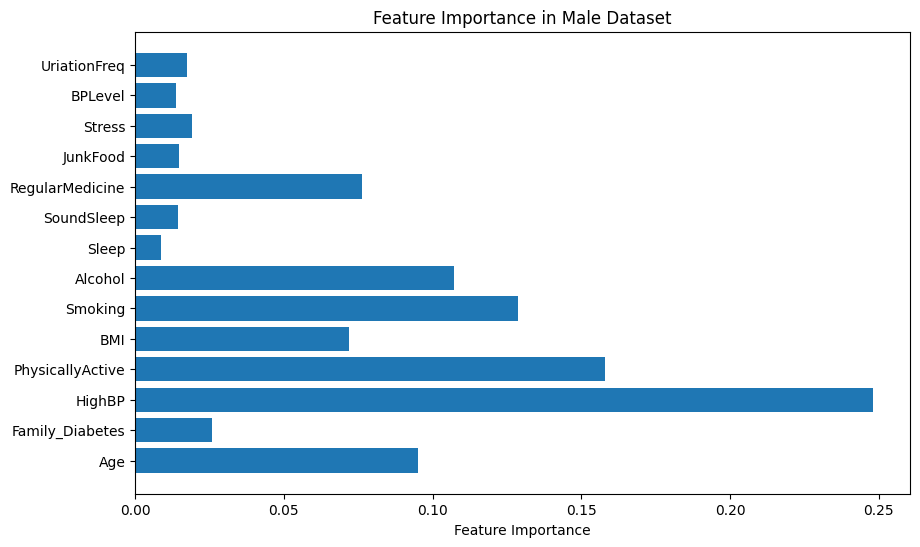

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 17. Feature Importance for Female Dataset
print("\nFeature Importance for Female Dataset:")
female_importances = xgb_female.feature_importances_

# Plot feature importance for female dataset
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(female_importances)), female_importances, align='center')
plt.yticks(np.arange(len(female_importances)), X_female.columns)  # Assuming you want to map feature names
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Female Dataset")
plt.show()

# 18. Feature Importance for Male Dataset
print("\nFeature Importance for Male Dataset:")
male_importances = xgb_male.feature_importances_

# Plot feature importance for male dataset
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(male_importances)), male_importances, align='center')
plt.yticks(np.arange(len(male_importances)), X_male.columns)  # Assuming you want to map feature names
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Male Dataset")
plt.show()

Training with Class Weights

[0]	validation_0-merror:0.32914	validation_1-merror:0.40184
[1]	validation_0-merror:0.31500	validation_1-merror:0.38060
[2]	validation_0-merror:0.30676	validation_1-merror:0.37755
[3]	validation_0-merror:0.30131	validation_1-merror:0.34994
[4]	validation_0-merror:0.30095	validation_1-merror:0.34780
[5]	validation_0-merror:0.29965	validation_1-merror:0.34998
[6]	validation_0-merror:0.29893	validation_1-merror:0.34619
[7]	validation_0-merror:0.29809	validation_1-merror:0.34248
[8]	validation_0-merror:0.29686	validation_1-merror:0.33030
[9]	validation_0-merror:0.29511	validation_1-merror:0.32702
[10]	validation_0-merror:0.28995	validation_1-merror:0.32413
[11]	validation_0-merror:0.28790	validation_1-merror:0.33100
[12]	validation_0-merror:0.28530	validation_1-merror:0.32983
[13]	validation_0-merror:0.28502	validation_1-merror:0.32671
[14]	validation_0-merror:0.28254	validation_1-merror:0.32874
[15]	validation_0-merror:0.28234	validation_1-merror:0.32839
[16]	validation_0-merror:0.28079	v

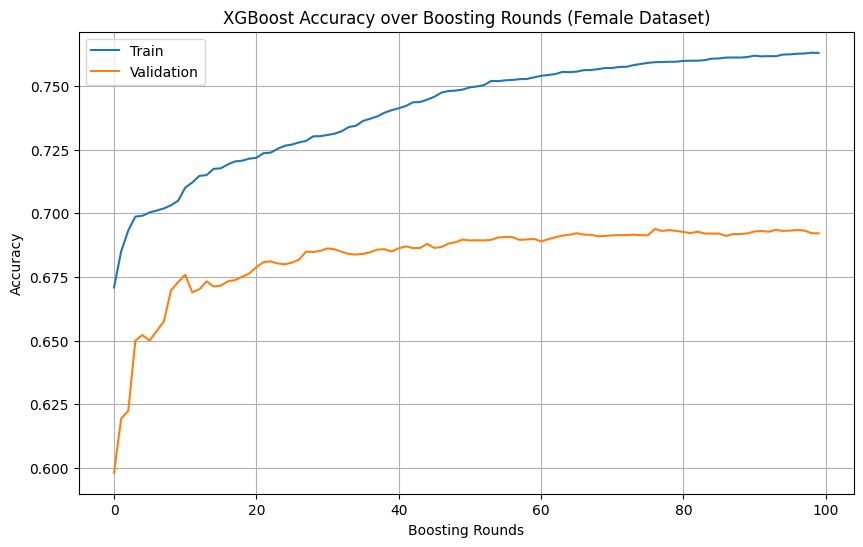

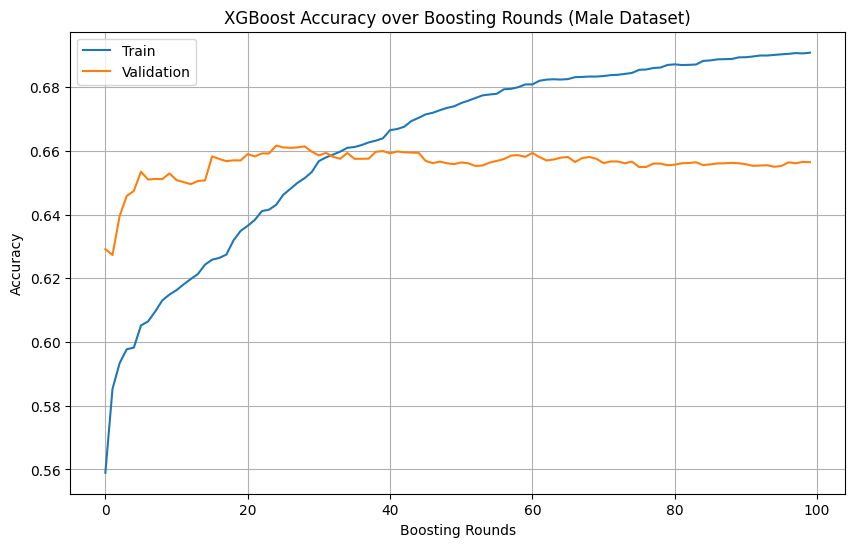

' This is the end of new code for assignment 3 and hands on 10/3'

In [11]:
# Calculate class weights
from sklearn.utils.class_weight import compute_sample_weight

# 1. Calculate class weights for the female dataset
female_sample_weights = compute_sample_weight(class_weight='balanced', y=y_female_resampled)

# 2. Calculate class weights for the male dataset
male_sample_weights = compute_sample_weight(class_weight='balanced', y=y_male_resampled)


# Define the evaluation sets (training and validation)
eval_set_female = [(X_female_resampled, y_female_resampled), (X_test_female, y_test_female)]
eval_set_male = [(X_male_resampled, y_male_resampled), (X_test_male, y_test_male)]

# 3. Train XGBoost model on the resampled female dataset using sample_weight
xgb_female = XGBClassifier(random_state=42, eval_metric='merror')
xgb_female.fit(X_female_resampled, y_female_resampled, sample_weight=female_sample_weights, eval_set=eval_set_female, verbose=True)

# 4. Train XGBoost model on the resampled male dataset using sample_weight
xgb_male = XGBClassifier(random_state=42, eval_metric='merror')
xgb_male.fit(X_male_resampled, y_male_resampled, sample_weight=male_sample_weights, eval_set=eval_set_male, verbose=True)

# 5. Make predictions and evaluate as before
y_pred_female = xgb_female.predict(X_test_female)
y_pred_male = xgb_male.predict(X_test_male)

print("Classification Report for Female Dataset:")
print(classification_report(y_test_female, y_pred_female))

print("\nClassification Report for Male Dataset:")
print(classification_report(y_test_male, y_pred_male))


# Extract evaluation results
evals_result_female = xgb_female.evals_result()
evals_result_male = xgb_male.evals_result()

# Plot the training and validation loss over iterations (boosting rounds)
epochs_female = len(evals_result_female['validation_0']['merror'])  # or 'error' if used as metric
x_axis_female = range(0, epochs_female)

# Plot accuracy
plt.figure(figsize=(10,6))
plt.plot(x_axis_female, 1 - np.array(evals_result_female['validation_0']['merror']), label='Train')
plt.plot(x_axis_female, 1 - np.array(evals_result_female['validation_1']['merror']), label='Validation')
plt.xlabel('Boosting Rounds')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy over Boosting Rounds (Female Dataset)')
plt.legend()
plt.grid(True)
plt.show()



# Plot the training and validation loss over iterations (boosting rounds)
epochs_male = len(evals_result_male['validation_0']['merror'])  # or 'error' if used as metric
x_axis_male = range(0, epochs_male)

# Plot accuracy
plt.figure(figsize=(10,6))
plt.plot(x_axis_male, 1 - np.array(evals_result_male['validation_0']['merror']), label='Train')
plt.plot(x_axis_male, 1 - np.array(evals_result_male['validation_1']['merror']), label='Validation')
plt.xlabel('Boosting Rounds')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy over Boosting Rounds (Male Dataset)')
plt.legend()
plt.grid(True)
plt.show()

''' This is the end of new code for assignment 3 and hands on 10/3'''



Using ADASYN instead of SMOTE (to handle class imbalance)

[0]	validation_0-merror:0.32819	validation_1-merror:0.39013
[1]	validation_0-merror:0.32549	validation_1-merror:0.37630
[2]	validation_0-merror:0.32170	validation_1-merror:0.37412
[3]	validation_0-merror:0.31931	validation_1-merror:0.36791
[4]	validation_0-merror:0.31638	validation_1-merror:0.35725
[5]	validation_0-merror:0.31517	validation_1-merror:0.34799
[6]	validation_0-merror:0.31261	validation_1-merror:0.33667
[7]	validation_0-merror:0.31166	validation_1-merror:0.34190
[8]	validation_0-merror:0.30839	validation_1-merror:0.33975
[9]	validation_0-merror:0.30512	validation_1-merror:0.34354
[10]	validation_0-merror:0.30397	validation_1-merror:0.33987
[11]	validation_0-merror:0.29987	validation_1-merror:0.34217
[12]	validation_0-merror:0.29761	validation_1-merror:0.34006
[13]	validation_0-merror:0.29704	validation_1-merror:0.33959
[14]	validation_0-merror:0.29440	validation_1-merror:0.33842
[15]	validation_0-merror:0.29394	validation_1-merror:0.33717
[16]	validation_0-merror:0.29292	v

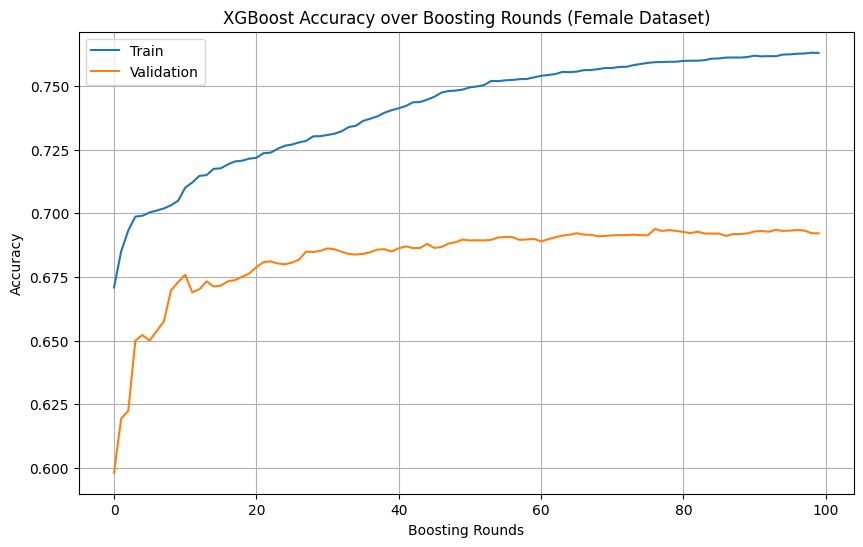

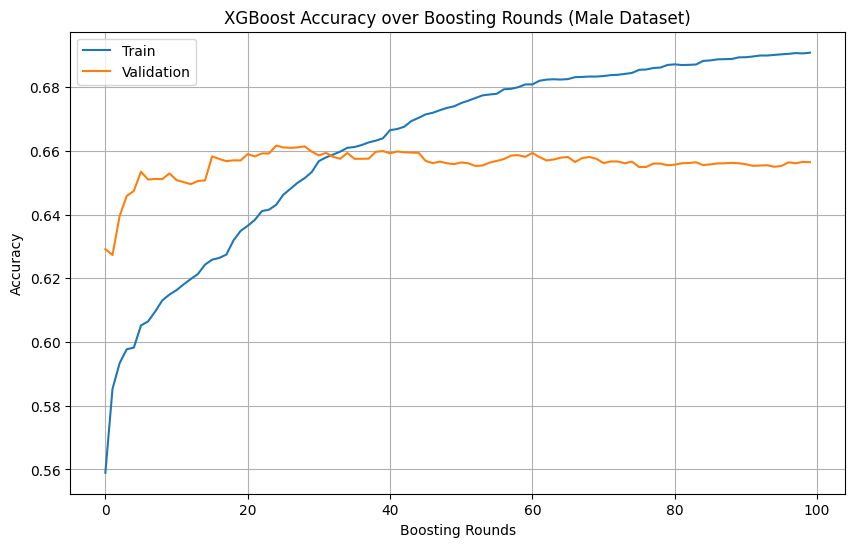

In [12]:
from imblearn.over_sampling import ADASYN

# 1. Apply SMOTEENN to the female dataset
adasyn = ADASYN(random_state=42)
X_female_resampled, y_female_resampled = adasyn.fit_resample(X_train_female, y_train_female)

# 2. Apply SMOTEENN to the male dataset
X_male_resampled, y_male_resampled = adasyn.fit_resample(X_train_male, y_train_male)

# Define the evaluation sets (training and validation)
eval_set_female = [(X_female_resampled, y_female_resampled), (X_test_female, y_test_female)]
eval_set_male = [(X_male_resampled, y_male_resampled), (X_test_male, y_test_male)]

# 3. Calculate class weights for the female dataset
female_sample_weights = compute_sample_weight(class_weight='balanced', y=y_female_resampled)

# 4. Calculate class weights for the male dataset
male_sample_weights = compute_sample_weight(class_weight='balanced', y=y_male_resampled)

# 3. Train XGBoost model on the resampled female dataset using sample_weight
xgb_female = XGBClassifier(random_state=42, eval_metric='merror')
xgb_female.fit(X_female_resampled, y_female_resampled, sample_weight=female_sample_weights, eval_set=eval_set_female, verbose=True)

# 4. Train XGBoost model on the resampled male dataset using sample_weight
xgb_male = XGBClassifier(random_state=42, eval_metric='merror')
xgb_male.fit(X_male_resampled, y_male_resampled, sample_weight=male_sample_weights, eval_set=eval_set_male, verbose=True)


# 7. Make predictions and evaluate as before
y_pred_female = xgb_female.predict(X_test_female)
y_pred_male = xgb_male.predict(X_test_male)

print("Classification Report for Female Dataset:")
print(classification_report(y_test_female, y_pred_female))

print("\nClassification Report for Male Dataset:")
print(classification_report(y_test_male, y_pred_male))

# Plot the training and validation loss over iterations (boosting rounds)
epochs_female = len(evals_result_female['validation_0']['merror'])  # or 'error' if used as metric
x_axis_female = range(0, epochs_female)

# Plot accuracy
plt.figure(figsize=(10,6))
plt.plot(x_axis_female, 1 - np.array(evals_result_female['validation_0']['merror']), label='Train')
plt.plot(x_axis_female, 1 - np.array(evals_result_female['validation_1']['merror']), label='Validation')
plt.xlabel('Boosting Rounds')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy over Boosting Rounds (Female Dataset)')
plt.legend()
plt.grid(True)
plt.show()



# Plot the training and validation loss over iterations (boosting rounds)
epochs_male = len(evals_result_male['validation_0']['merror'])  # or 'error' if used as metric
x_axis_male = range(0, epochs_male)

# Plot accuracy
plt.figure(figsize=(10,6))
plt.plot(x_axis_male, 1 - np.array(evals_result_male['validation_0']['merror']), label='Train')
plt.plot(x_axis_male, 1 - np.array(evals_result_male['validation_1']['merror']), label='Validation')
plt.xlabel('Boosting Rounds')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy over Boosting Rounds (Male Dataset)')
plt.legend()
plt.grid(True)
plt.show()




Using RandomizedSearchCV (Hyperparameter Tuning)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees
    'max_depth': [3, 5, 7, 10],            # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],     # Step size shrinkage
    'subsample': [0.7, 0.8, 1.0],          # Percentage of samples used per tree
    'colsample_bytree': [0.7, 0.8, 1.0],   # Percentage of features used per tree
    'gamma': [0, 0.1, 0.3, 0.5],           # Minimum loss reduction for further partitioning
    'scale_pos_weight': [1, 3, 5]          # Control imbalance
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,                              # Number of parameter settings sampled
    scoring='accuracy',                  # Scoring metric for multiclass classification
    cv=3,                                   # 3-fold cross-validation
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV to the female dataset
random_search.fit(X_female_resampled, y_female_resampled)

# Best estimator after tuning
best_xgb_female = random_search.best_estimator_

# Display the best hyperparameters
print("Best Hyperparameters for Female Dataset:", random_search.best_params_)

# Evaluate the tuned model
y_pred_female = best_xgb_female.predict(X_test_female)
print("Classification Report for Tuned XGBoost on Female Dataset:")
print(classification_report(y_test_female, y_pred_female))

# Extract cv_results_ after tuning
results = random_search.cv_results_

# Extract mean test scores and standard deviations for each combination
mean_test_scores = results['mean_test_score']
std_test_scores = results['std_test_score']

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(mean_test_scores)), mean_test_scores, label='Mean Accuracy')
plt.fill_between(np.arange(len(mean_test_scores)),
                 mean_test_scores - std_test_scores,
                 mean_test_scores + std_test_scores, color='b', alpha=0.2)
plt.title('Accuracy Curve After Hyperparameter Tuning (Female)')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Fit RandomizedSearchCV to the male dataset
random_search.fit(X_male_resampled, y_male_resampled)

# Best estimator after tuning
best_xgb_male = random_search.best_estimator_

# Display the best hyperparameters
print("Best Hyperparameters for Male Dataset:", random_search.best_params_)

# Evaluate the tuned model
y_pred_male = best_xgb_male.predict(X_test_male)
print("Classification Report for Tuned XGBoost on Male Dataset:")
print(classification_report(y_test_male, y_pred_male))

# Extract cv_results_ after tuning
results = random_search.cv_results_

# Extract mean test scores and standard deviations for each combination
mean_test_scores = results['mean_test_score']
std_test_scores = results['std_test_score']

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(mean_test_scores)), mean_test_scores, label='Mean Accuracy')
plt.fill_between(np.arange(len(mean_test_scores)),
                 mean_test_scores - std_test_scores,
                 mean_test_scores + std_test_scores, color='b', alpha=0.2)
plt.title('Accuracy Curve After Hyperparameter Tuning (Male)')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.legend()
plt.show()

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:03:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:03:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:04:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:05:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:05:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weigh

In [ ]:
!pip install imbalanced-learn tensorflow scikit-learn xgboost scikeras

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN  # Import SMOTE for oversampling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization, ReLU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Use SMOTEENN to perform a combination of over-sampling the minority class and under-sampling the majority class
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", y_resampled.value_counts())
'''
# Neural Network Model
# Build a simple neural network model
model = Sequential([
    Dense(64, input_dim=X_resampled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes: no diabetes, prediabetes, type 2 diabetes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_resampled, y_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test))
'''



Class distribution after SMOTE: Diabetes_012
1.0    134210
2.0    105899
0.0     98684
Name: count, dtype: int64


"\n# Neural Network Model\n# Build a simple neural network model\nmodel = Sequential([\n    Dense(64, input_dim=X_resampled.shape[1], activation='relu'),\n    Dense(32, activation='relu'),\n    Dense(3, activation='softmax')  # 3 output classes: no diabetes, prediabetes, type 2 diabetes\n])\n\n# Compile the model\nmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])\n\n# Train the model\nhistory = model.fit(X_resampled, y_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test))\n"

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier


# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Neural Network Test Accuracy: {test_accuracy:.4f}")

# RandomForest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)
rf_predictions = rf_model.predict(X_test)

print("\nRandomForest Classification Report:")
print(classification_report(y_test, rf_predictions))

# XGBoost Model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_resampled, y_resampled)
xgb_predictions = xgb_model.predict(X_test)

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5537 - loss: 1.1274
Neural Network Test Accuracy: 0.5548

RandomForest Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.76      0.83     39508
         1.0       0.03      0.06      0.04      1079
         2.0       0.32      0.59      0.42      6689

    accuracy                           0.72     47276
   macro avg       0.42      0.47      0.43     47276
weighted avg       0.81      0.72      0.75     47276


XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87     39508
         1.0       0.04      0.01      0.02      1079
         2.0       0.36      0.59      0.45      6689

    accuracy                           0.78     47276
   macro avg       0.44      0.48      0.44     47276
weighted avg       0.81      0.78      0.79     47276



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Define the Keras model
def create_nn_model():
    model = Sequential([
        Dense(128, input_shape=(X_resampled.shape[1],), activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(3, activation='softmax')  # 3 output classes
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model using KerasClassifier
nn_model = KerasClassifier(model=create_nn_model, epochs=50, batch_size=64, verbose=1)

# Callbacks: EarlyStopping and ReduceLROnPlateau
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compute class weights
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_dict = dict(enumerate(class_weights))

# Train the model
history = nn_model.fit(X_resampled, y_resampled, validation_data=(X_test, y_test), class_weight=class_weights_dict,
                    callbacks=[reduce_lr, early_stop])

# Evaluate Neural Network
test_accuracy = nn_model.score(X_test, y_test)
print(f"Neural Network Test Accuracy: {test_accuracy:.4f}")

# Step 7: RandomForest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)
rf_predictions = rf_model.predict(X_test)

print("\nRandomForest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Step 8: XGBoost Model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_resampled, y_resampled)
xgb_predictions = xgb_model.predict(X_test)

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

# Step 9: Stacking Classifier (Neural Network, RandomForest, XGBoost)
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define Stacking Classifier with Logistic Regression as meta-learner
estimators = [('xgb', xgb_model), ('nn', nn_model)]
stacked_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

# Train Stacking Classifier
stacked_model.fit(X_resampled, y_resampled)

# Evaluate Stacking Classifier
stacked_predictions = stacked_model.predict(X_test)
print("\nStacking Classifier Classification Report:")
print(classification_report(y_test, stacked_predictions))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.5648 - loss: 0.8603 - val_accuracy: 0.5914 - val_loss: 1.0435
Epoch 2/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5923 - loss: 0.7950 - val_accuracy: 0.6042 - val_loss: 1.0404
Epoch 3/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5984 - loss: 0.7891 - val_accuracy: 0.6109 - val_loss: 0.9932
Epoch 4/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6036 - loss: 0.7841 - val_accuracy: 0.6202 - val_loss: 1.0106
Epoch 5/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6081 - loss: 0.7791 - val_accuracy: 0.6230 - val_loss: 1.0090
Epoch 6/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6124 - loss: 0.7734 - val_accuracy: 0.6088 - val_loss: 1.0032
Epoch 7/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6136 - loss: 0.7715 - val_accuracy: 0.6174 - val_loss: 1.0092
Epoch 8/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6172 - loss: 0.7699 -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.5725 - loss: 0.8762
Epoch 2/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5985 - loss: 0.8098
Epoch 3/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6083 - loss: 0.8009
Epoch 4/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6116 - loss: 0.7973
Epoch 5/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6202 - loss: 0.7898
Epoch 6/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6214 - loss: 0.7860
Epoch 7/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6237 - loss: 0.7831
Epoch 8/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6264 - loss: 0.7809
Epoch 9/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6262 - loss: 0.7818
Epoch 10/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6288 - loss: 0.7789
Epoch 11/50
5294/5294 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6293 - loss: 0.7774
Epoch 12/50
5294/5294 ━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4235/4235 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5643 - loss: 0.8893
Epoch 2/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5939 - loss: 0.8166
Epoch 3/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6003 - loss: 0.8099
Epoch 4/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6069 - loss: 0.8056
Epoch 5/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6123 - loss: 0.7984
Epoch 6/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6157 - loss: 0.7935
Epoch 7/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6185 - loss: 0.7916
Epoch 8/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6200 - loss: 0.7899
Epoch 9/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6201 - loss: 0.7901
Epoch 10/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6227 - loss: 0.7855
Epoch 11/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6230 - loss: 0.7870
Epoch 12/50
4235/4235 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4235/4235 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5665 - loss: 0.8858
Epoch 2/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5996 - loss: 0.8109
Epoch 3/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6041 - loss: 0.8031
Epoch 4/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6123 - loss: 0.7982
Epoch 5/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6106 - loss: 0.7953
Epoch 6/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6176 - loss: 0.7883
Epoch 7/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6176 - loss: 0.7887
Epoch 8/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6214 - loss: 0.7879
Epoch 9/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6229 - loss: 0.7835
Epoch 10/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6267 - loss: 0.7801
Epoch 11/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6275 - loss: 0.7778
Epoch 12/50
4235/4235 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4235/4235 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5662 - loss: 0.8928
Epoch 2/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5959 - loss: 0.8110
Epoch 3/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6041 - loss: 0.8058
Epoch 4/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6082 - loss: 0.7998
Epoch 5/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6129 - loss: 0.7935
Epoch 6/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6153 - loss: 0.7924
Epoch 7/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6198 - loss: 0.7881
Epoch 8/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6212 - loss: 0.7874
Epoch 9/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6242 - loss: 0.7811
Epoch 10/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6278 - loss: 0.7791
Epoch 11/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6271 - loss: 0.7781
Epoch 12/50
4235/4235 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4235/4235 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5699 - loss: 0.8819
Epoch 2/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5971 - loss: 0.8099
Epoch 3/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6064 - loss: 0.8006
Epoch 4/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6112 - loss: 0.7970
Epoch 5/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6142 - loss: 0.7929
Epoch 6/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6179 - loss: 0.7888
Epoch 7/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6212 - loss: 0.7840
Epoch 8/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6244 - loss: 0.7805
Epoch 9/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6262 - loss: 0.7807
Epoch 10/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6269 - loss: 0.7783
Epoch 11/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6265 - loss: 0.7777
Epoch 12/50
4235/4235 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4235/4235 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5665 - loss: 0.8856
Epoch 2/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5960 - loss: 0.8132
Epoch 3/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6038 - loss: 0.8050
Epoch 4/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6079 - loss: 0.7991
Epoch 5/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6129 - loss: 0.7951
Epoch 6/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6184 - loss: 0.7887
Epoch 7/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6214 - loss: 0.7862
Epoch 8/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6248 - loss: 0.7828
Epoch 9/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6255 - loss: 0.7802
Epoch 10/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6257 - loss: 0.7799
Epoch 11/50
4235/4235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6274 - loss: 0.7788
Epoch 12/50
4235/4235 ━━━━━━━━━━━━━━━━━━

Saving XGBoost Model and NN model

In [ ]:
import joblib
from tensorflow.keras.models import save_model

nn_model.model_.save('nn_model.keras')
joblib.dump(xgb_model, 'xgb_model.pkl')


['xgb_model.pkl']

Performing Transfer Learning on Best Model (Gestational Dataset)




In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU, ReLU
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the new dataset
data = pd.read_csv('/content/gestational_diabetes_dataset.csv')
# load pretrained model
nn_pretrained_model = load_model('/content/nn_model.keras')
xgb_model = joblib.load('/content/xgb_model.pkl')



# Get the input shape from the dataset (8 features)
input_shape = (8,)

# Build a new model based on the pre-trained model
model = Sequential()

# Modify the input layer to match the new dataset
model.add(Dense(128, input_shape=input_shape))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.2))

# Reuse the rest of the pre-trained layers (we'll add them layer by layer)
for layer in nn_pretrained_model.layers[1:-1]:
    model.add(layer)

# Add a new output layer with 1 neuron for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the new model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure that the XGBoost model is correctly configured for binary classification
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost performance
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))


history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[reduce_lr, early_stop], verbose=1)

# Evaluate Neural Network
test_accuracy = nn_model.score(X_test, y_test)
print(f"Neural Network Test Accuracy: {test_accuracy:.4f}")


# Define Stacking Classifier with Logistic Regression as meta-learner
estimators = [('xgb', xgb_model), ('nn', nn_model)]
stacked_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

# Train Stacking Classifier
stacked_model.fit(X_train, y_train)

# Evaluate Stacking Classifier
stacked_predictions = stacked_model.predict(X_test)
print("\nStacking Classifier Classification Report:")
print(classification_report(y_test, stacked_predictions))


'''
# Select features and labels
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[features]
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Load the pre-trained model
model = load_model('/content/all_features_batchnormal_lr_scheduler/best_model_units1_128_units2_64_dropout_0.2.h5')

# 2. Modify the input layer dimension to match the new dataset (8 features)
new_input = layers.Input(shape=(X_train.shape[1],))  # Shape matches the 8 features of the new dataset
old_layers = model.layers[1:]  # Exclude the original input layer

# Reconnect the old layers with the new input
x = new_input
for layer in old_layers:
    x = layer(x)

# Build the new model
new_model = Model(inputs=new_input, outputs=x)

# 3. Freeze all layers except the last one
for layer in new_model.layers[:-1]:  # Freeze all layers except the last one
    layer.trainable = False

# 4. Modify the last layer for binary classification
new_model.layers[-1] = layers.Dense(1, activation='sigmoid')  # Adjust this for binary classification

# 5. Compile the model
new_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Learning Rate Scheduler
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

# Train the modified model on the new dataset
history = new_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[lr_schedule], verbose=1)

# Save the updated model
new_model.save('/content/gestational_health_indicator_model/model.h5')
'''









ValueError: Input 0 of layer "batch_normalization" is incompatible with the layer: expected axis -1 of input shape to have value 128, but received input with shape (None, 8)

Test Predictions on Fine Tuned Model

In [ ]:
import numpy as np

# Load the fine-tuned model
fine_tuned_model = load_model('fine_tuned_model_with_modified_input.h5')

# Perform predictions on the test data
y_pred = fine_tuned_model.predict(X_test_scaled)

# Convert probabilities to binary outcome (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Display the first few predictions and their corresponding true values
predictions_comparison = pd.DataFrame({'True Outcome': y_test, 'Predicted Outcome': y_pred_binary.flatten()})
print(predictions_comparison.head())

# Evaluate the model on the test data
test_loss, test_accuracy = fine_tuned_model.evaluate(X_test_scaled, y_test)

# Print out the test accuracy and loss
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
     True Outcome  Predicted Outcome
668             0                  0
324             0                  0
624             0                  0
690             0                  0
473             0                  0
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7671 - loss: 0.5610
Test Accuracy: 77.92%
Test Loss: 0.5521


Using new dataset with more features: https://github.com/steve-zeyu-zhang/DiabetesDiagnosis/blob/main/data/BIT_2019.csv

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/BIT_2019.csv'
data = pd.read_csv(file_path)

# Function to classify diabetes status based on Diabetic, Pdiabetes, and Pregancies columns
def classify_diabetes(row):
    if row['Diabetic'] == 'no' and row['Pdiabetes'] == 0:
        return 'No Diabetes'
    elif row['Pdiabetes'] == 1:
        return 'Prediabetes'
    elif row['Diabetic'] == 'yes' and row['Pregancies'] == 0:
        return 'Type-2 Diabetes'
    elif row['Diabetic'] == 'yes' and row['Pregancies'] > 0:
        return 'Gestational Diabetes'
    else:
        return 'Unknown'

# Fill missing values in 'Pdiabetes' and 'Diabetic' columns
data['Pdiabetes'].fillna('0', inplace=True)  # Assuming no prediabetes for missing values
data['Diabetic'].fillna('no', inplace=True)  # Assuming no diabetes for missing values

# Standardize the 'Pdiabetes' column to binary format (0 for no, 1 for yes)
data['Pdiabetes'] = data['Pdiabetes'].replace({'yes': 1, 'no': 0, '0': 0}).astype(int)

# Apply the classification function to create the target column 'Diabetes_Status'
data['Diabetes_Status'] = data.apply(classify_diabetes, axis=1)

# Check the distribution of the newly created 'Diabetes_Status' column
print(data['Diabetes_Status'].value_counts())

# Drop rows where 'Diabetes_Status' is 'Unknown'
data_cleaned = data[data['Diabetes_Status'] != 'Unknown']

# Check the updated distribution after dropping 'Unknown' cases
print(data_cleaned['Diabetes_Status'].value_counts())

print(data.head())

Diabetes_Status
No Diabetes             684
Type-2 Diabetes         188
Gestational Diabetes     64
Prediabetes              14
Unknown                   2
Name: count, dtype: int64
Diabetes_Status
No Diabetes             684
Type-2 Diabetes         188
Gestational Diabetes     64
Prediabetes              14
Name: count, dtype: int64
     Age Gender Family_Diabetes highBP      PhysicallyActive   BMI Smoking  \
0  50-59   Male              no    yes        one hr or more  39.0      no   
1  50-59   Male              no    yes  less than half an hr  28.0      no   
2  40-49   Male              no     no        one hr or more  24.0      no   
3  50-59   Male              no     no        one hr or more  23.0      no   
4  40-49   Male              no     no  less than half an hr  27.0      no   

  Alcohol  Sleep  SoundSleep RegularMedicine      JunkFood     Stress BPLevel  \
0      no      8           6              no  occasionally  sometimes    high   
1      no      8           6     

Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import joblib

# Drop the 'Diabetic' column as it's redundant
X = data_cleaned.drop(['Diabetic', 'Diabetes_Status', 'JunkFood', 'RegularMedicine', 'Stress', 'Alcohol', 'Smoking', 'UriationFreq'], axis=1)
y = data_cleaned['Diabetes_Status']

# Define a function to convert age ranges to numeric values (e.g., using the midpoint of the range)
def convert_age_range(age_range):
    if isinstance(age_range, str) and '-' in age_range:
        age_min, age_max = age_range.split('-')
        return (int(age_min) + int(age_max)) // 2
    else:
        return pd.to_numeric(age_range, errors='coerce')  # Handle any non-range values

# Apply the function to the Age column
X['Age'] = X['Age'].apply(convert_age_range)

# Split the data into training and testing sets before scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode categorical columns and scale numerical columns
categorical_features = ['Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BPLevel']
numerical_features = ['Age', 'BMI', 'Pregancies', 'Sleep', 'SoundSleep']

# Create a preprocessor that scales numerical data and one-hot encodes categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Fit the preprocessor on the training data and transform both the training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Save the preprocesser
joblib.dump(preprocessor, 'structured_data_preprocessor.pkl')


# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_processed)

# Encode the target variable (y_train) using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Check class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y_train_encoded))

# Apply SMOTE to the imputed training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train_encoded)

# Check class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_train_smote))


Class distribution before SMOTE: Counter({1: 548, 3: 150, 0: 53, 2: 9})
Class distribution after SMOTE: Counter({3: 548, 1: 548, 0: 548, 2: 548})


Correlation Matrix

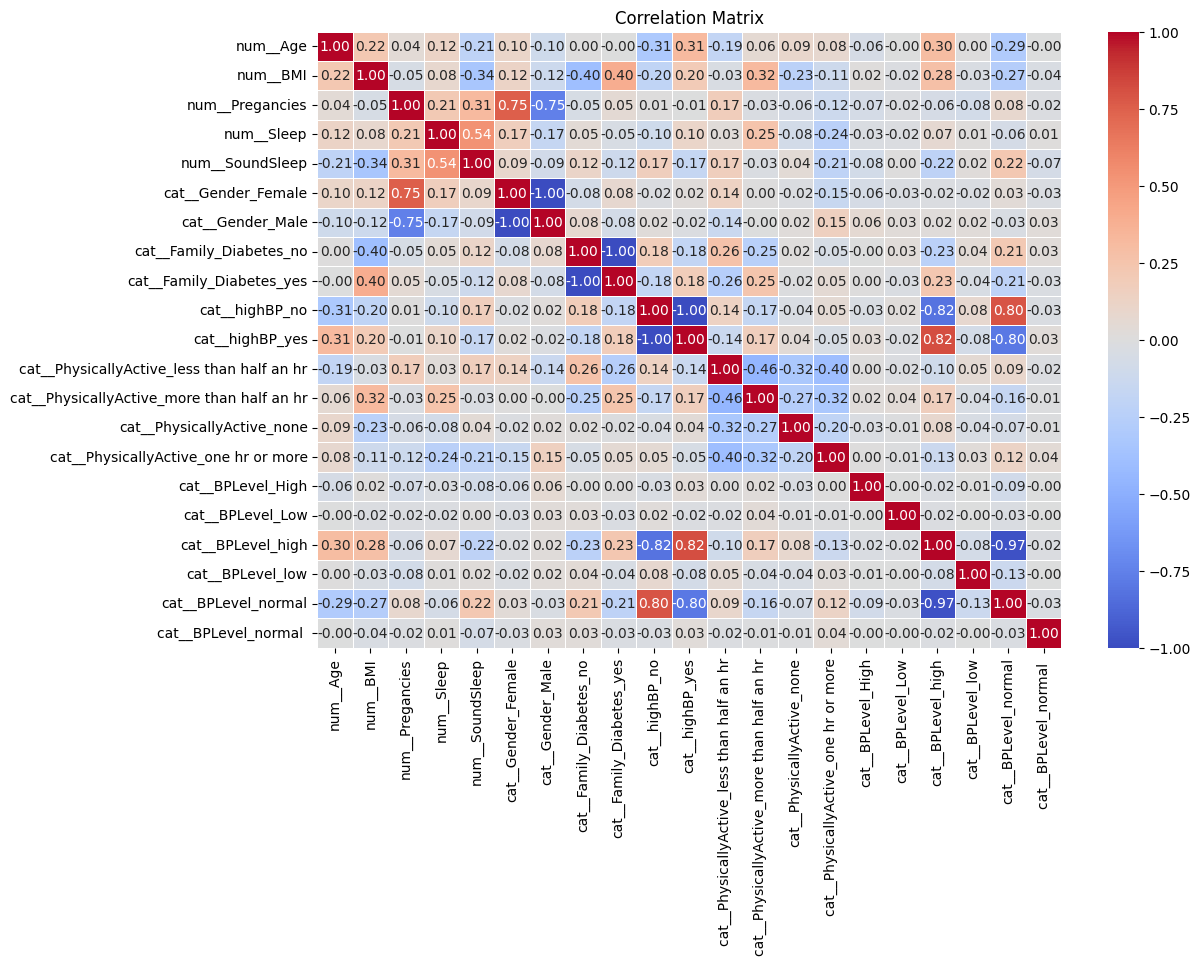

                                            num__Age  num__BMI  \
num__Age                                    1.000000  0.224231   
num__BMI                                    0.224231  1.000000   
num__Pregancies                             0.041380 -0.051735   
num__Sleep                                  0.120101  0.082829   
num__SoundSleep                            -0.208612 -0.338907   
cat__Gender_Female                          0.104641  0.121285   
cat__Gender_Male                           -0.104641 -0.121285   
cat__Family_Diabetes_no                     0.001084 -0.395507   
cat__Family_Diabetes_yes                   -0.001084  0.395507   
cat__highBP_no                             -0.314097 -0.201473   
cat__highBP_yes                             0.314097  0.201473   
cat__PhysicallyActive_less than half an hr -0.185094 -0.031740   
cat__PhysicallyActive_more than half an hr  0.061297  0.317563   
cat__PhysicallyActive_none                  0.086097 -0.231783   
cat__Physi

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

X_train_smote_df = pd.DataFrame(X_train_smote, columns=preprocessor.get_feature_names_out())

# Generate the correlation matrix
corr_matrix = X_train_smote_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

print(corr_matrix)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model to evaluate feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train_smote_df.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df)


                                       Feature  Importance
2                              num__Pregancies    0.201440
1                                     num__BMI    0.103969
4                              num__SoundSleep    0.088791
3                                   num__Sleep    0.071287
5                           cat__Gender_Female    0.066445
6                             cat__Gender_Male    0.062803
0                                     num__Age    0.055569
11  cat__PhysicallyActive_less than half an hr    0.051491
7                      cat__Family_Diabetes_no    0.044413
17                           cat__BPLevel_high    0.042462
10                             cat__highBP_yes    0.036169
8                     cat__Family_Diabetes_yes    0.035827
13                  cat__PhysicallyActive_none    0.032243
9                               cat__highBP_no    0.030436
19                         cat__BPLevel_normal    0.029254
12  cat__PhysicallyActive_more than half an hr    0.0257

In [ ]:
# Keep the top 15 most important features
top_n = 15
top_features = feature_importance_df.head(top_n)['Feature']

# Save top features to list and dump into file using joblib

top_features_list = top_features.tolist()

joblib.dump(top_features_list, 'top_features_list.pkl')


# Filter the dataset to keep only the top features
X_train_top_features = X_train_smote_df[top_features]
X_test_top_features = X_test_processed[:, :len(top_features)]  # Ensure the test set matches the selected features

''' Top Features '''
'''
num__Pregancies (0.205519)
num__BMI (0.095190)
num__SoundSleep (0.081070)
num__Sleep (0.071806)
cat__Gender_Male (0.058135)
num__Age (0.053376)
cat__Gender_Female (0.052271)
cat__Family_Diabetes_yes (0.044955)
cat__PhysicallyActive_less than half an hr (0.044192)
cat__PhysicallyActive_none (0.038670)
cat__Family_Diabetes_no (0.037938)
cat__BPLevel_high (0.037674)
cat__highBP_no (0.034218)
cat__highBP_yes (0.032206)
cat__BPLevel_normal (0.027395)

'''


'\nnum__Pregancies (0.205519)\nnum__BMI (0.095190)\nnum__SoundSleep (0.081070)\nnum__Sleep (0.071806)\ncat__Gender_Male (0.058135)\nnum__Age (0.053376)\ncat__Gender_Female (0.052271)\ncat__Family_Diabetes_yes (0.044955)\ncat__PhysicallyActive_less than half an hr (0.044192)\ncat__PhysicallyActive_none (0.038670)\ncat__Family_Diabetes_no (0.037938)\ncat__BPLevel_high (0.037674)\ncat__highBP_no (0.034218)\ncat__highBP_yes (0.032206)\ncat__BPLevel_normal (0.027395)\n\n'

Fine Tune Trained Model on New Dataset

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ReduceLROnPlateau


# Load the fine-tuned model
fine_tuned_model = load_model('fine_tuned_model_with_modified_input.h5')

# Number of classes (No Diabetes, Prediabetes, Type-2 Diabetes, Gestational Diabetes)
num_classes = 4

# Build a new model for fine-tuning with multi-class output
model = Sequential()

# Modify the input layer to accept only 15 features
model.add(Dense(128, input_shape=(15,), activation='relu'))
model.add(Dropout(0.2))

# Manually add the remaining layers from the pre-trained model with unique names
for i, layer in enumerate(fine_tuned_model.layers[1:-1]):  # Exclude the last layer
    if isinstance(layer, BatchNormalization):  # Handle BatchNormalization
        model.add(BatchNormalization(name=f"{layer.name}_{i}"))
    elif isinstance(layer, Dropout):  # Handle Dropout
        model.add(Dropout(rate=layer.rate, name=f"{layer.name}_{i}"))
    elif isinstance(layer, LeakyReLU):  # Handle LeakyReLU activation layer without passing alpha
        model.add(LeakyReLU(name=f"{layer.name}_{i}"))
    elif isinstance(layer, Dense):  # Handle Dense layers
        model.add(Dense(units=layer.units, activation=layer.activation, name=f"{layer.name}_{i}"))

# Add a new output layer for multi-class classification (4 classes)
model.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class output

# Compile the model with sparse categorical crossentropy loss (for label-encoded targets)
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: All layers added to a Sequential model should have unique names. Name 'dropout_2' is already the name of a layer in this model. Update the `name` argument to pass a unique name.

In [ ]:
print(X_train_top_features.dtypes)  # Check if all columns are numerical

print(X_train_top_features.shape)  # Should be (num_samples, 15)
print(X_test_top_features.shape)   # Should be (num_samples, 15)

import numpy as np

# Ensure the features and labels are NumPy arrays
X_train_top_features = np.array(X_train_top_features)
X_test_top_features = np.array(X_test_top_features)
y_train_smote = np.array(y_train_smote)
y_test = np.array(y_test)



num__Pregancies                               float64
num__BMI                                      float64
num__SoundSleep                               float64
num__Sleep                                    float64
cat__Gender_Female                            float64
cat__Gender_Male                              float64
num__Age                                      float64
cat__PhysicallyActive_less than half an hr    float64
cat__Family_Diabetes_no                       float64
cat__BPLevel_high                             float64
cat__highBP_yes                               float64
cat__Family_Diabetes_yes                      float64
cat__PhysicallyActive_none                    float64
cat__highBP_no                                float64
cat__BPLevel_normal                           float64
dtype: object
(2192, 15)
(190, 15)


In [ ]:
print(y_train_smote.shape)  # Should be (num_samples,)
print(y_test_encoded.shape)         # Should be (num_samples,)


(2192,)
(190,)


In [ ]:
print(X_train_top_features.shape)  # Expected shape: (num_samples, 15)
print(X_test_top_features.shape)   # Expected shape: (num_samples, 15)
print(y_train_smote.shape)         # Expected shape: (num_samples,)
print(y_test_encoded.shape)                # Expected shape: (num_samples,)

# Reshape labels to 1D if needed
y_train_smote = y_train_smote.reshape(-1)
y_test_encoded = y_test_encoded.reshape(-1)

# Check the model's output layer
model.summary()  # Ensure the output layer has 4 units and uses softmax

(2192, 15)
(190, 15)
(2192,)
(190,)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_0                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18_3             │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_18_4 (LeakyReLU)         │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12_5 (Dropout)               │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25_6 (Dense)                   │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19_7             │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_19_8 (LeakyReLU)         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13_9 (Dropout)               │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26_10 (Dense)                  │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20_11            │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_20_12 (LeakyReLU)        │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,924 (54.39 KB)

 Trainable params: 13,220 (51.64 KB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
print(np.unique(y_train_smote))  # Check unique values in y_train_smote
print(np.unique(y_test_encoded))         # Check unique values in y_test


[0 1 2 3]
[0 1 2 3]


In [ ]:
from sklearn.preprocessing import LabelEncoder


model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Initialize ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Train the model on the label-encoded target variable
# Train the model
history = model.fit(X_train_top_features, y_train_smote,
                    validation_data=(X_test_top_features, y_test_encoded),
                    epochs=50, batch_size=32, callbacks=[reduce_lr])


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_top_features, y_test_encoded)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the fine-tuned model
model.save('fine_tuned_model_on_new_dataset.h5')

Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.3516 - loss: 3.9841 - val_accuracy: 0.0053 - val_loss: nan - learning_rate: 1.0000e-04
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3689 - loss: 4.0221 - val_accuracy: 0.0053 - val_loss: nan - learning_rate: 1.0000e-04
Epoch 3/50
37/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4027 - loss: 3.9524 
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4009 - loss: 3.9722 - val_accuracy: 0.0053 - val_loss: nan - learning_rate: 1.0000e-04
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3659 - loss: 4.0111 - val_accuracy: 0.0053 - val_loss: nan - learning_rate: 5.0000e-05
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3825 - loss: 3.9957 - val_accuracy: 0.0053 - val_loss: nan - learning_rate: 5.0000e-05
Epoch 6/50
37/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3327 - loss: 4.0631 
Epoch 6: 

Test Accuracy: 0.53%


Model trained on CGM dataset

Epoch 1/50
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6070 - loss: 2.0777 - val_accuracy: 0.7897 - val_loss: 1.7366 - learning_rate: 1.0000e-05
Epoch 2/50
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8037 - loss: 1.6070 - val_accuracy: 0.8123 - val_loss: 1.2318 - learning_rate: 1.0000e-05
Epoch 3/50
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8187 - loss: 1.1672 - val_accuracy: 0.8391 - val_loss: 0.9940 - learning_rate: 1.0000e-05
Epoch 4/50
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8404 - loss: 0.9528 - val_accuracy: 0.8498 - val_loss: 0.8249 - learning_rate: 1.0000e-05
Epoch 5/50
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8487 - loss: 0.8000 - val_accuracy: 0.8563 - val_loss: 0.7043 - learning_rate: 1.0000e-05
Epoch 6/50
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8538 - loss: 0.6924 - val_accuracy: 0.8657 - val_loss: 0.6195 - learning_rate: 1.0000e-05
Epoch 7/50
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 10s 

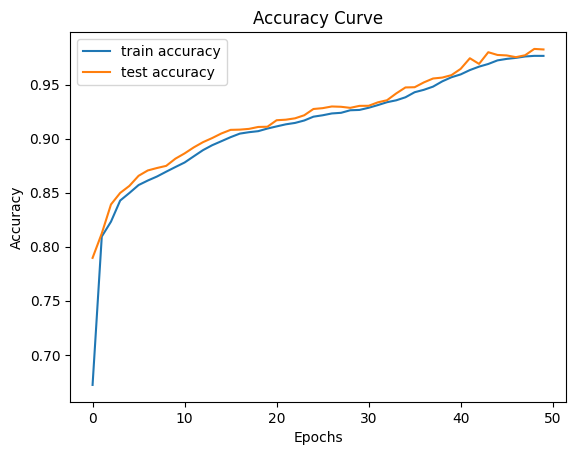

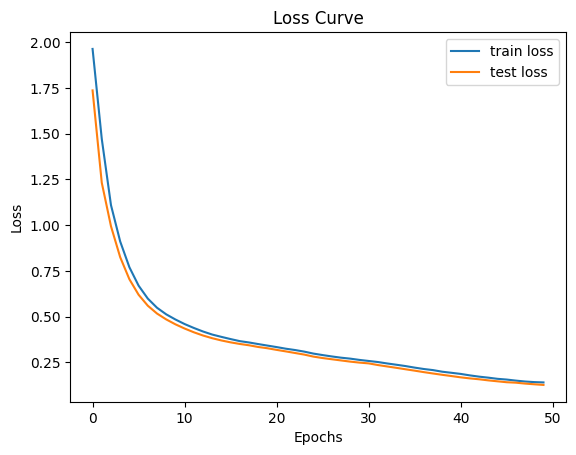

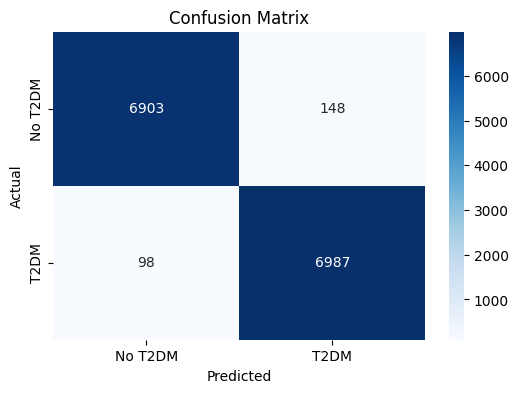

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau


# Load the dataset
df = pd.read_csv('/content/merged_CGM_clinical_data.csv')

# Preprocess the data
df['Hora'] = pd.to_timedelta(df['Hora']).dt.total_seconds()
df = df.dropna()

numerical_cols = ['Hora', 'Glucemia', 'BMI', 'age', 'HbA1c', 'follow.up']

# Scale the numerical columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Handle class imbalance by oversampling the minority class
from sklearn.utils import resample

# Check class distribution
df_majority = df[df.T2DM == False]
df_minority = df[df.T2DM == True]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority and upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Prepare the features and target
X_data = df_upsampled[numerical_cols].values
y_data = df_upsampled['T2DM'].astype(int).values

# Set the number of timesteps (window size)
window_size = 10  # Adjust this to the number of timesteps you want

# Define a function to create sequences of data (sliding window approach)
def create_sequences(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size])  # Predict the value after the window
    return np.array(X), np.array(y)

# Create sequences
X, y = create_sequences(X_data, y_data, window_size)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model with regularization and dropout
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define input shape with multiple timesteps
model.add(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01)))  # L2 regularization
model.add(Dropout(0.3))  # Increased dropout to prevent overfitting
model.add(LSTM(64, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Initialize ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No T2DM', 'T2DM'], yticklabels=['No T2DM', 'T2DM'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [ ]:
model.save('/content/time_series_model.h5')

Combining trained Dense Model and Time Series Model

In [ ]:
from tensorflow import keras

# Load the two models
model_1_path = '/content/time_series_model.h5'
model_2_path = '/content/fine_tuned_model_on_new_dataset.h5'

# Load models
model_1 = keras.models.load_model(model_1_path)
model_2 = keras.models.load_model(model_2_path)

# Summarize the models to analyze their architectures
model_1.summary()
model_2.summary()

model_2.input_shape


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                       │ (None, 10, 64)              │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_53 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,853 (206.46 KB)

 Trainable params: 52,851 (206.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_0                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18_3             │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_18_4 (LeakyReLU)         │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12_5 (Dropout)               │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25_6 (Dense)                   │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19_7             │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_19_8 (LeakyReLU)         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13_9 (Dropout)               │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26_10 (Dense)                  │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20_11            │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_20_12 (LeakyReLU)        │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,926 (54.40 KB)

 Trainable params: 13,220 (51.64 KB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 2 (12.00 B)

(None, 15)

In [ ]:
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras.models import Model

# Define input shapes based on the original models
time_series_input_shape = model_1.input_shape[1:]  # Exclude batch size
fine_tuned_input_shape = model_2.input_shape[1:]   # Exclude batch size

# Create new input layers for both models
time_series_input = Input(shape=time_series_input_shape)
fine_tuned_input = Input(shape=fine_tuned_input_shape)

# Call each model on its respective input
time_series_output = model_1(time_series_input)
fine_tuned_output = model_2(fine_tuned_input)

# Concatenate the outputs from the two models
combined_features = concatenate([time_series_output, fine_tuned_output])

# Add a new output layer for the combined model
new_output = Dense(4, activation='softmax')(combined_features)  # 4 classes

# Create the new combined model
combined_model = Model(inputs=[time_series_input, fine_tuned_input], outputs=new_output)

# Compile the model (use suitable optimizer and loss for multiclass classification)
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the new combined model
combined_model.summary()

combined_model.save('/content/final_deep_learning_model.h5')



Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 10, 6)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 15)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_44             │ (None, 1)              │         52,851 │ input_layer_2[0][0]    │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_6 (Sequential) │ (None, 4)              │         13,924 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 5)              │              0 │ sequential_44[1][0],   │
│ (Concatenate)             │                        │                │ sequential_6[1][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 4)              │             24 │ concatenate_2[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 66,799 (260.93 KB)

 Trainable params: 66,095 (258.18 KB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
from tensorflow.keras.models import load_model

# Load the combined model
combined_model = load_model('final_deep_learning_model.h5')

# Get the input shapes of the combined model
time_series_input_shape = combined_model.input[0].shape
fine_tuned_input_shape = combined_model.input[1].shape

print(f"Time Series Input Shape: {time_series_input_shape}")
print(f"Fine-Tuned Input Shape: {fine_tuned_input_shape}")

Time Series Input Shape: (None, 10, 6)
Fine-Tuned Input Shape: (None, 15)


In [ ]:

import pandas as pd

# Load the dataset
time_series_data = pd.read_csv('/content/merged_CGM_clinical_data.csv')

# Display the first few rows to check the structure
print(time_series_data.head())


   Patient_ID      Hora  Glucemia  gender  age   BMI  glycaemia  HbA1c  \
0           1  00:00:00      87.0       1   77  25.4        106    6.3   
1           1  00:00:03      95.0       1   77  25.4        106    6.3   
2           1  00:00:05     104.0       1   77  25.4        106    6.3   
3           1  00:00:06     159.0       1   77  25.4        106    6.3   
4           1  00:00:07     114.0       1   77  25.4        106    6.3   

   follow.up   T2DM  
0      413.0  False  
1      413.0  False  
2      413.0  False  
3      413.0  False  
4      413.0  False  
